<a href="https://colab.research.google.com/github/jayant2014/MyML/blob/master/NLTP_Gitanjali_Type_Lyrics_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import numpy as np

In [8]:
# Tokenizer
tokenizer = Tokenizer()

data = open('gitanjali.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'of': 3, 'my': 4, 'i': 5, 'in': 6, 'to': 7, 'is': 8, 'thy': 9, 'me': 10, 'with': 11, 'it': 12, 'a': 13, 'that': 14, 'this': 15, 'not': 16, 'all': 17, 'thou': 18, 'on': 19, 'thee': 20, 'for': 21, 'from': 22, 'when': 23, 'at': 24, 'heart': 25, 'come': 26, 'have': 27, 'its': 28, 'life': 29, 'was': 30, 'they': 31, 'there': 32, 'but': 33, 'has': 34, 'will': 35, 'light': 36, 'be': 37, 'no': 38, 'day': 39, 'let': 40, 'by': 41, 'where': 42, 'ever': 43, 'into': 44, 'their': 45, "'": 46, 'only': 47, 'his': 48, 'out': 49, 'what': 50, 'night': 51, 'upon': 52, 'love': 53, 'know': 54, 'shall': 55, 'are': 56, 'up': 57, 'as': 58, 'who': 59, 'world': 60, 'sky': 61, 'her': 62, 'he': 63, 'your': 64, 'through': 65, 'one': 66, 'time': 67, 'door': 68, 'comes': 69, 'you': 70, 'face': 71, 'before': 72, 'like': 73, 'them': 74, 'eyes': 75, 'him': 76, 'joy': 77, 'morning': 78, 'if': 79, 'last': 80, 'never': 81, 'dark': 82, 'had': 83, 'we': 84, 'take': 85, 'am': 86, 'many': 87, 'give': 88, 'h

In [0]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [10]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['flight'])
print(tokenizer.word_index['life'])
print(tokenizer.word_index['wings'])

6
1
621
29
620


In [11]:
print(xs[6])
print(ys[6])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  18  89 202
  10 152 256   8]
[0. 0. 0. ... 0. 0. 0.]


In [12]:
print(xs[5])
print(ys[5])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  18  89
 202  10 152 256]
[0. 0. 0. ... 0. 0. 0.]


In [13]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'of': 3, 'my': 4, 'i': 5, 'in': 6, 'to': 7, 'is': 8, 'thy': 9, 'me': 10, 'with': 11, 'it': 12, 'a': 13, 'that': 14, 'this': 15, 'not': 16, 'all': 17, 'thou': 18, 'on': 19, 'thee': 20, 'for': 21, 'from': 22, 'when': 23, 'at': 24, 'heart': 25, 'come': 26, 'have': 27, 'its': 28, 'life': 29, 'was': 30, 'they': 31, 'there': 32, 'but': 33, 'has': 34, 'will': 35, 'light': 36, 'be': 37, 'no': 38, 'day': 39, 'let': 40, 'by': 41, 'where': 42, 'ever': 43, 'into': 44, 'their': 45, "'": 46, 'only': 47, 'his': 48, 'out': 49, 'what': 50, 'night': 51, 'upon': 52, 'love': 53, 'know': 54, 'shall': 55, 'are': 56, 'up': 57, 'as': 58, 'who': 59, 'world': 60, 'sky': 61, 'her': 62, 'he': 63, 'your': 64, 'through': 65, 'one': 66, 'time': 67, 'door': 68, 'comes': 69, 'you': 70, 'face': 71, 'before': 72, 'like': 73, 'them': 74, 'eyes': 75, 'him': 76, 'joy': 77, 'morning': 78, 'if': 79, 'last': 80, 'never': 81, 'dark': 82, 'had': 83, 'we': 84, 'take': 85, 'am': 86, 'many': 87, 'give': 88, 'h

In [15]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=1000, verbose=1)
#print model.summary()
print(model)

Epoch 1/1000
368/368 [==============================] - 6s 15ms/step - loss: 6.1359 - accuracy: 0.0782
Epoch 2/1000
368/368 [==============================] - 5s 15ms/step - loss: 5.2993 - accuracy: 0.1282
Epoch 3/1000
368/368 [==============================] - 5s 15ms/step - loss: 4.5478 - accuracy: 0.1800
Epoch 4/1000
368/368 [==============================] - 5s 14ms/step - loss: 3.7514 - accuracy: 0.2456
Epoch 5/1000
368/368 [==============================] - 5s 15ms/step - loss: 2.9947 - accuracy: 0.3365
Epoch 6/1000
368/368 [==============================] - 5s 15ms/step - loss: 2.3213 - accuracy: 0.4469
Epoch 7/1000
368/368 [==============================] - 6s 15ms/step - loss: 1.8456 - accuracy: 0.5409
Epoch 8/1000
368/368 [==============================] - 5s 15ms/step - loss: 1.4577 - accuracy: 0.6265
Epoch 9/1000
368/368 [==============================] - 5s 15ms/step - loss: 1.2351 - accuracy: 0.6840
Epoch 10/1000
368/368 [==============================] - 5s 15ms/step - l

In [16]:
model.save('sequential_gitanjali.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: sequential_gitanjali.model/assets


In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

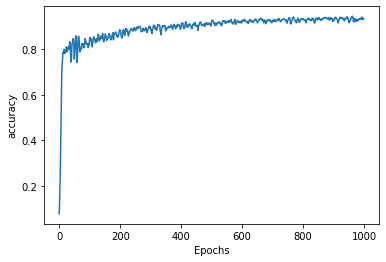

In [18]:
plot_graphs(history, 'accuracy')

In [22]:
seed_text = "On the seashore of endless worlds"
#seed_text = "My wings eager to fly"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

On the seashore of endless worlds children meet tempest roams in the pathless sky ships get wrecked in the trackless water death is abroad and children play on the seashore of endless worlds is the great meeting of children eyes that as i have a corner seat on their lids that were their notes have always proclaimed he comes comes ever comes ' she raised this is bound you in the wake oh awaken let not the day has a flower for a prize you came down and stood at my cottage door cannot fear lest hard when but encloses will be with love the sweet
